In [ ]:
import tensorflow as tf
import os


In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
os.listdir(data_dir)

['sad', 'happy']

In [ ]:
#data_dir = "/content/data"
#checkpoint_dir = os.path.join(data_dir, ".ipynb_checkpoints")

#os.rmdir(checkpoint_dir)

FileNotFoundError: ignored

In [ ]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(image_class_path):
        for image in os.listdir(image_class_path):
            image_path = os.path.join(image_class_path, image)
       
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts: 
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                print('Issue with image {}'.format(image_path))
                #os.remove(image_path)    


Image not in ext list data/sad/50740738-sad-people-s-portraits.jpg
Image not in ext list data/sad/80698765-collage-of-people-face-expression-worried-unhappy.jpg
Image not in ext list data/sad/depositphotos_9023386-stock-photo-very-cute-little-boy-with.jpg
Image not in ext list data/sad/article-2029228-01C3E98B000004B0-620_233x423.jpg
Image not in ext list data/sad/78684122-set-of-diversity-people-sad-face-expression-emotion-studio-collage.jpg
Image not in ext list data/sad/81617453-collage-of-people-face-expression-worried-unhappy.jpg
Image not in ext list data/sad/sad-young-boy-260nw-180020327.jpg
Image not in ext list data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data/sad/63799429-sad-unhappy-crying-man-face-people-emotional-expressions-.jpg
Image not in ext list data/sad/81739222-set-of-diversity-people-sad-face-expression-emotion-studio-collage.jpg
Image not in ext list data/sad/smQxqvj.jpg
Image not in ext list data/sad/80378010-set-of-d

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
print(data_dir)

data


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 202 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()


In [ ]:
batch = data_iterator.next()

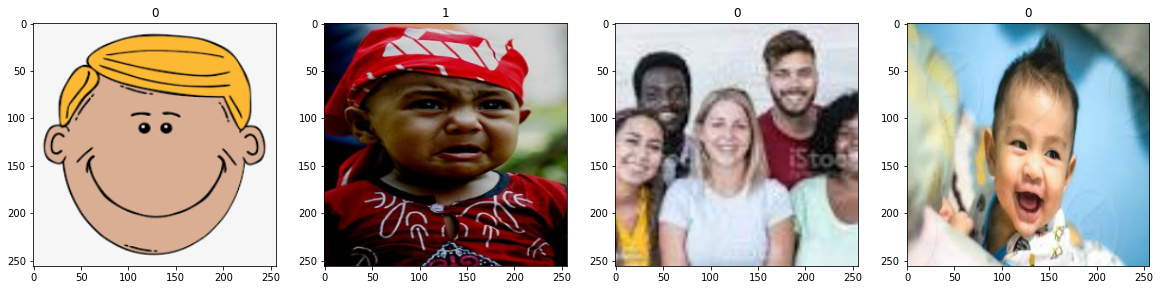

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))


In [ ]:
data.as_numpy_iterator().next()


(array([[[[0.81421566, 0.8691176 , 0.8730392 ],
          [0.819244  , 0.874146  , 0.874146  ],
          [0.8240196 , 0.87892157, 0.87892157],
          ...,
          [0.8779412 , 0.9137255 , 0.9098039 ],
          [0.8714729 , 0.906767  , 0.90284544],
          [0.8612745 , 0.90343136, 0.90588236]],
 
         [[0.81758195, 0.8724839 , 0.8764055 ],
          [0.8222618 , 0.87716377, 0.87716377],
          [0.82783014, 0.8827321 , 0.8827321 ],
          ...,
          [0.88059515, 0.91637945, 0.9124579 ],
          [0.8745098 , 0.9098039 , 0.90588236],
          [0.86519605, 0.9073529 , 0.9098039 ]],
 
         [[0.8156863 , 0.87058824, 0.87058824],
          [0.8235294 , 0.8784314 , 0.8784314 ],
          [0.8279412 , 0.88284314, 0.88284314],
          ...,
          [0.8745098 , 0.9137255 , 0.9098039 ],
          [0.8745098 , 0.9137255 , 0.9098039 ],
          [0.8730392 , 0.9044118 , 0.9137255 ]],
 
         ...,
 
         [[0.7497281 , 0.8242379 , 0.85168886],
          [0.74736

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size


4

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
model = Sequential()


In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [80]:
logdir='logs'


In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [82]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
4/4 [==============================] - 13s 3s/step - loss: 1.1568 - accuracy: 0.5469 - val_loss: 0.9009 - val_accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 11s 2s/step - loss: 0.6935 - accuracy: 0.6484 - val_loss: 0.4905 - val_accuracy: 0.7812
Epoch 3/20
4/4 [==============================] - 12s 3s/step - loss: 0.5791 - accuracy: 0.7188 - val_loss: 0.5864 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 11s 3s/step - loss: 0.5661 - accuracy: 0.7109 - val_loss: 0.4327 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 11s 2s/step - loss: 0.5323 - accuracy: 0.6953 - val_loss: 0.4945 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 12s 2s/step - loss: 0.5222 - accuracy: 0.7344 - val_loss: 0.3735 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 12s 3s/step - loss: 0.4478 - accuracy: 0.8125 - val_loss: 0.4201 - val_accuracy: 0.8438
Epoch 8/20
4/4 [==================

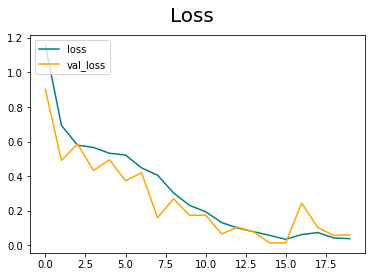

In [83]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

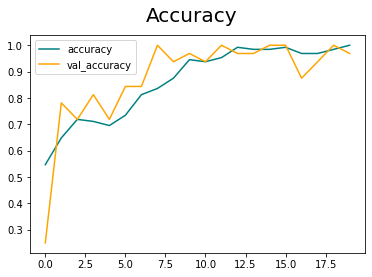

In [84]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [85]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [86]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [87]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [88]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [89]:
import cv2

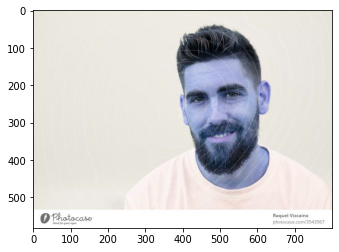

In [90]:
img = cv2.imread('/content/data/happy/-and-happy-man-with-a-beard-and-white-shirt-dot-photocase-stock-photo-large.jpeg')
plt.imshow(img)
plt.show()

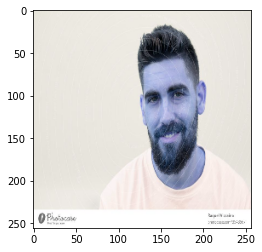

In [91]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 117ms/step


In [93]:
yhat

array([[0.03508924]], dtype=float32)

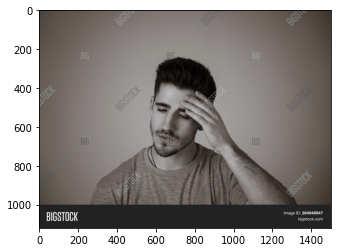

In [94]:
img1 = cv2.imread('/content/data/sad/284948947.jpg')
plt.imshow(img1)
plt.show()

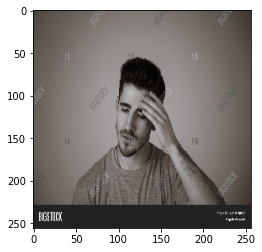

In [96]:
resize1 = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [97]:
yhat1 = model.predict(np.expand_dims(resize1/255, 0))


1/1 [==============================] - 0s 33ms/step


In [98]:
yhat1

array([[0.90130085]], dtype=float32)

In [99]:
img3 = cv2.imread('/content/testimg.jpeg')
resize3 = tf.image.resize(img3, (256,256))
yhat3 = model.predict(np.expand_dims(resize3/255, 0))
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')




1/1 [==============================] - 0s 33ms/step
Predicted class is Happy


In [100]:
from tensorflow.keras.models import load_model


In [105]:
model.save(os.path.join('models','imageclassifier.h5'))


In [106]:
new_model = load_model('/content/models/imageclassifier.h5')


In [109]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 81ms/step


array([[0.90130085]], dtype=float32)

In [111]:
import zipfile

def zipdir(path, ziph):
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))

zipf = zipfile.ZipFile('FirstClassification.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('data', zipf)
zipdir('logs', zipf)
zipdir('models', zipf)
zipf.close()
